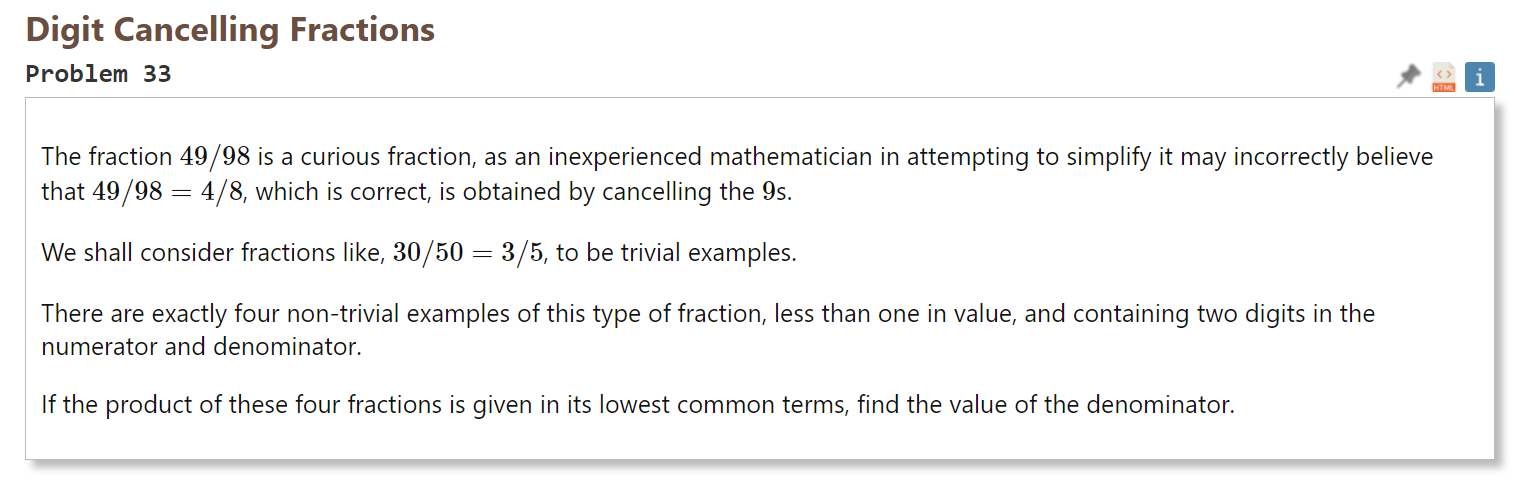

In [2]:
from math import sqrt
def simplify(numerator, denominator, cf=1):
    if numerator == 1:
        return numerator, denominator, cf
    if denominator%numerator == 0:
        return 1, denominator//numerator, numerator
    # Check what are the factors of numerator, see if denominator shares any
    for possible_divisor in range(2, int(sqrt(numerator))+1):
        if numerator%possible_divisor == 0:
            other_divisor = numerator//possible_divisor
            if denominator%other_divisor == 0:
                new_num, new_den, new_cf = simplify(
                    numerator//other_divisor,
                    denominator//other_divisor
                )
                return new_num, new_den, cf*new_cf*other_divisor
            elif denominator%possible_divisor == 0:
                new_num, new_den, new_cf =  simplify(
                    numerator//possible_divisor,
                    denominator//possible_divisor
                )
                return new_num, new_den, cf*new_cf*possible_divisor
                
    # If they share no factors the fraction is resilient (there exists no a)
    return numerator, denominator, cf

assert simplify(1, 2) == (1, 2, 1)
assert simplify(3, 15) == (1, 5, 3)
assert simplify(2, 3) == (2, 3, 1)
assert simplify(15, 165) == (1, 11, 15)
assert simplify(15, 55) == (3, 11, 5)

In [8]:
nums = []
dems = []
for denominator in range(10, 100):
    str_denominator = str(denominator)
    for numerator in range(10, 100):
        if numerator >= denominator:
            break
        str_numerator = str(numerator)
        for digit in str_numerator:
            if digit == '0':
                continue
            try:
                new_num = int(str_numerator.replace(digit, ''))
                new_den = int(str_denominator.replace(digit, ''))
            except:
                continue
            if new_num == 0 or new_den == 0:
                continue
            sim_old_num, sim_old_den, _ = simplify(numerator, denominator)
            sim_new_num, sim_new_den, _ = simplify(new_num, new_den)
            if sim_old_num == sim_new_num and sim_old_den == sim_new_den:
                print(numerator, denominator)
                nums.append(numerator)
                dems.append(denominator)

16 64
26 65
19 95
49 98


In [13]:
def prod(nums):
    prod = 1
    for num in nums:
        prod *= num
    return prod

In [15]:
simplify(prod(nums), prod(dems))

(1, 100, 387296)